## scikit-learn

## (1) Linear regression
Here we use scikit-learn to solve a linear regression problem
<a id='scikit-learn'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit

Let's first create a dataset:

In [2]:
def f(x, m, b):
    return m * x + b

In [3]:
npoints = 100
dmax = 10

x = np.linspace(0, 99, npoints).reshape(-1, 1) # x needs to be a 2D array
m = 2.0
b = 5.0
y_data = f(x, m, b).flatten() + np.random.randn(npoints) * dmax 
y_orig = f(x, m, b).flatten()

Let's first plot the data and have a look

TRAIN: [53 92 78 13  7 30 22 24 33  8 43 62  3 71 45 48  6 99 82 76 60 80 90 68
 51 27 18 56 63 74  1 61 42 41  4 15 17 40 38  5 91 59  0 34 28 50 11 35
 23 52 10 31 66 57 79 85 32 84 14 89 19 29 49 97 98 69 20 94 72 77 25 37
 81 46 39 65 58 12 88 70 87 36 21 83  9 96 67 64 47 44]
TEST: [26 86  2 55 75 93 16 73 54 95]


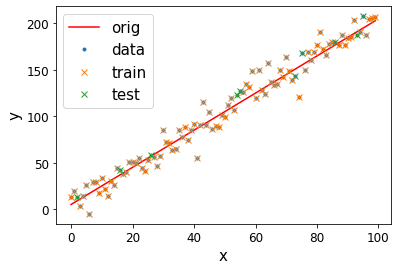

In [4]:
rs = ShuffleSplit(n_splits=1, test_size=.1, random_state=0)

for train, test in rs.split(x):
    print(f"TRAIN: {train}")
    print(f"TEST: {test}")
    
    plt.plot(x[:,0], y_orig, c='red', label='orig')
    plt.plot(x[:,0], y_data, '.', label = 'data')
    plt.plot(x[train],y_data[train], 'x', label = 'train')
    plt.plot(x[test],y_data[test], 'x', label = 'test')
    plt.legend(fontsize=15)
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [5]:
# fit the data with a linear regression model:

reg = linear_model.LinearRegression()
reg.fit(x[train],y_data[train])   
m_fit = reg.coef_[0]         
b_fit = reg.intercept_         

print(f'Fitted slope = {m_fit:5.3f}')
print(f'Fitted intercept = {b_fit:5.3f}')

Fitted slope = 2.032
Fitted intercept = 4.881


Compute y values predicted by the model and plot

In [6]:
y_pred_all = reg.predict(x)         
y_pred_test = reg.predict(x[test])
y_pred_train = reg.predict(x[train])

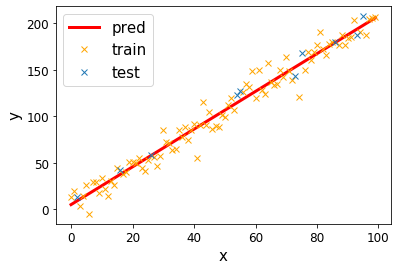

In [7]:
plt.plot(x,y_pred_all, c='red', label='pred', lw=3)
plt.plot(x[train],y_data[train],'x', c='orange', label = 'train')
plt.plot(x[test],y_data[test], 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('linear_regression-01.pdf', bbox_inches='tight')
plt.show()

In [8]:
# get coefficient of determination R^2 

r2 = r2_score(y_data[test],y_pred_test)

print(f'R2 score = {r2:8.5f}')

R2 score =  0.98585


In [9]:
# get mean squared error and mean absolute error of test and training set

mse_test = mean_squared_error(y_data[test],y_pred_test)
mse_train = mean_squared_error(y_data[train],y_pred_train)

mae_test = mean_absolute_error(y_data[test],y_pred_test)
mae_train = mean_absolute_error(y_data[train],y_pred_train)

print(f'MSE test  = {mse_test:8.5f}    MAE test  = {mae_test:8.5f}')
print(f'MSE train = {mse_train:8.5f}     MAE train = {mae_train:8.5f}')

MSE test  = 56.45940    MAE test  =  6.55857
MSE train = 115.42849     MAE train =  8.24350


## (2) Using the diabetes dataset

In [10]:
from sklearn import datasets

In [11]:
# load diabetes dataset (all data have been mean centered and scaled by the standard deviation times n_samples)

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [12]:
# pick a certain column

xcol=['age','sex','body mass index','average blood pressure','total serum cholesterol','low-density lipoproteins','total cholesterol/HDL','serum triglycerides level','blood surgar level']

col = 2
data_x = diabetes_X[:,col]
data_y = diabetes_y
ndata = len(data_x)

print('\nAnalysing data for %s:\n' % xcol[col])

# randomly assing 90% of the data to the training set and the remaining 10% to the test set

ntrain = int(0.9 * ndata)

order = np.random.permutation(ndata)
x_rand = data_x[order]
y_rand = data_y[order]

x_train = x_rand[:ntrain]
y_train = y_rand[:ntrain]
x_test = x_rand[ntrain:]
y_test = y_rand[ntrain:]

# alternative way of picking random train/test ste
# x_train = []
# y_train = []

# x_test = data_x
# y_test = data_y

# for i in range(ntrain):
#     index = np.random.randint(0,ndata-i)
#     x_train.append(x_test[index])
#     y_train.append(y_test[index])
    
#     x_test = np.delete(x_test,index)
#     y_test = np.delete(y_test,index)
    
# x_train = np.array(x_train)
# y_train = np.array(y_train)

x_train = x_train[:,np.newaxis]  # x_train needs to be a 2D array, y_train a 1D array
x_test = x_test[:,np.newaxis]
data_x = data_x[:,np.newaxis]


# plot the data

plt.plot(data_x,data_y, '.', label = 'data')
plt.plot(x_train,y_train, 'x', label = 'train')
plt.plot(x_test,y_test, 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel(xcol[col], fontsize=15)
plt.ylabel('disease progression', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Analysing data for total cholesterol/HDL:



In [13]:
# fit the data using linear regression

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)   
m_fit = reg.coef_              # w1
b_fit = reg.intercept_         # w0

print('Fitted slope = %5.3f' % m_fit)
print('Fitted intercept = %5.3f' % b_fit)


# compute values predicted by the model

y_pred_all = reg.predict(data_x)         # y values predicted by the model
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


# plot predicted values together with training and test data

plt.plot(data_x,y_pred_all, c='red', label='pred', lw=3)
plt.plot(x_train,y_train,'x', c='orange', label = 'train')
plt.plot(x_test,y_test, 'x', label = 'test')
plt.legend(fontsize=15)
plt.xlabel(xcol[col], fontsize=15)
plt.ylabel('disease progression', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('diabetes_fit.pdf', bbox_inches='tight')
plt.show()

# get R2, MSE, and MAE

r2 = reg.score(x_test,y_test)
print('R2 score = %8.5f' % r2)

mse_test = mean_squared_error(y_test,y_pred_test)
mse_train = mean_squared_error(y_train,y_pred_train)

mae_test = mean_absolute_error(y_test,y_pred_test)
mae_train = mean_absolute_error(y_train,y_pred_train)

print('MSE test  = %8.4f    MAE test  = %8.4f' % (mse_test,mae_test))
print('MSE train = %8.4f    MAE train = %8.4f' % (mse_train,mae_train))

In [ ]:
# loop over all column

xcol=['age','sex','body mass index','average blood pressure','total serum cholesterol','low-density lipoproteins','total cholesterol/HDL','serum triglycerides level','blood surgar level']
reg = linear_model.LinearRegression()

for i in range(len(xcol)):
    col = i
    data_x = diabetes_X[:,col]
    data_y = diabetes_y
    ndata = len(data_x)
    
    print('\nAnalysing data for %s:\n' % xcol[col])
    
    # randomly acessing 80% of the data to the training set and the remaining 10% to the test set

    ntrain = int(0.8 * ndata)

    order = np.random.permutation(ndata)
    x_rand = data_x[order]
    y_rand = data_y[order]

    x_train = x_rand[:ntrain]
    y_train = y_rand[:ntrain] 
    x_test = x_rand[ntrain:]
    y_test = y_rand[ntrain:]

    x_train = x_train[:,np.newaxis]  # x_train needs to be a 2D array, y_train a 1D array
    x_test = x_test[:,np.newaxis]
    data_x = data_x[:,np.newaxis]
    
    # fit the data using linear regression

    
    reg.fit(x_train,y_train)   
    m_fit = reg.coef_              # w1
    b_fit = reg.intercept_         # w0

    print('Fitted slope = %5.3f' % m_fit)
    print('Fitted intercept = %5.3f' % b_fit)


    # compute values predicted by the model

    y_pred_all = reg.predict(data_x)         # y values predicted by the model
    y_pred_test = reg.predict(x_test)
    y_pred_train = reg.predict(x_train)


    # plot predicted values together with training and test data

    plt.plot(data_x,y_pred_all, c='red', label='pred', lw=3)
    plt.plot(x_train,y_train,'x', c='orange', label = 'train')
    plt.plot(x_test,y_test, 'x', label = 'test')
    plt.legend(fontsize=15)
    plt.xlabel(xcol[col], fontsize=15)
    plt.ylabel('disease progression', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #plt.savefig('diabetes_fit.pdf', bbox_inches='tight')
    plt.show()

    # get R2, MSE, and MAE

    r2 = reg.score(x_test,y_test)
    print('R2 score = %8.5f' % r2)

    mse_test = mean_squared_error(y_test,y_pred_test)
    mse_train = mean_squared_error(y_train,y_pred_train)

    mae_test = mean_absolute_error(y_test,y_pred_test)
    mae_train = mean_absolute_error(y_train,y_pred_train)

    print('MSE test  = %8.4f    MAE test  = %8.4f' % (mse_test,mae_test))
    print('MSE train = %8.4f    MAE train = %8.4f' % (mse_train,mae_train))
    print('\n')